In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined data
combined_data = pd.read_parquet('/Users/maushariff/Downloads/Local_Disk_E/Byrav/Internet2_Data/Data/combined_router_dallas_atla_data.parquet')


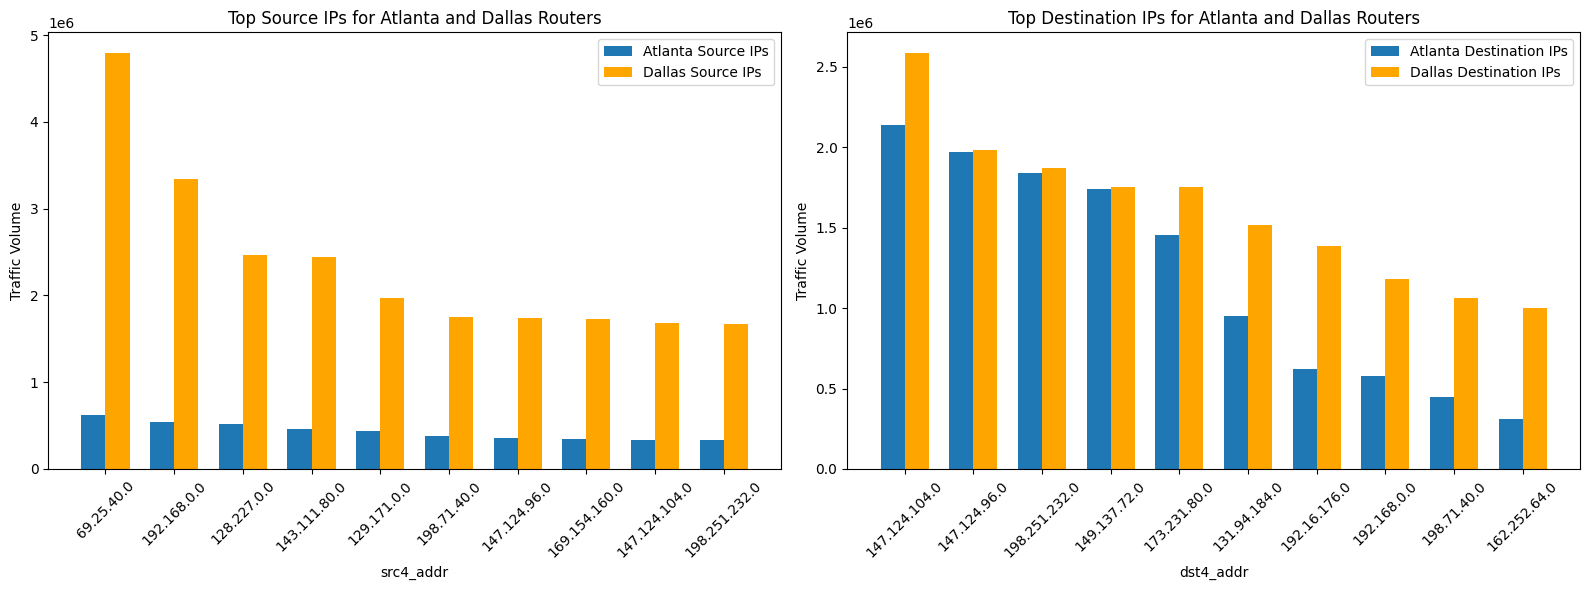

In [2]:

import numpy as np
import matplotlib.pyplot as plt

# Top 10 Source and Destination IP addresses by traffic volume
top_src_atlanta = combined_data[combined_data['router'] == 'Atlanta']['src4_addr'].value_counts().head(10)
top_dst_atlanta = combined_data[combined_data['router'] == 'Atlanta']['dst4_addr'].value_counts().head(10)
top_src_dallas = combined_data[combined_data['router'] == 'Dallas']['src4_addr'].value_counts().head(10)
top_dst_dallas = combined_data[combined_data['router'] == 'Dallas']['dst4_addr'].value_counts().head(10)

# Define positions for side-by-side bars
x_src = np.arange(len(top_src_atlanta))  # x locations for Atlanta Source IPs
x_dst = np.arange(len(top_dst_atlanta))  # x locations for Atlanta Destination IPs

width = 0.35  # Width of the bars

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Top Source IPs side by side
axes[0].bar(x_src - width/2, top_src_atlanta.values, width, label='Atlanta Source IPs', color='#1f77b4')
axes[0].bar(x_src + width/2, top_src_dallas.values, width, label='Dallas Source IPs', color='orange')
axes[0].set_title('Top Source IPs for Atlanta and Dallas Routers')
axes[0].set_ylabel('Traffic Volume')
axes[0].set_xlabel('src4_addr')
axes[0].set_xticks(x_src)
axes[0].set_xticklabels(top_src_atlanta.index, rotation=45)
axes[0].legend()

# Plot Top Destination IPs side by side
axes[1].bar(x_dst - width/2, top_dst_atlanta.values, width, label='Atlanta Destination IPs', color='#1f77b4')
axes[1].bar(x_dst + width/2, top_dst_dallas.values, width, label='Dallas Destination IPs', color='orange')
axes[1].set_title('Top Destination IPs for Atlanta and Dallas Routers')
axes[1].set_ylabel('Traffic Volume')
axes[1].set_xlabel('dst4_addr')
axes[1].set_xticks(x_dst)
axes[1].set_xticklabels(top_dst_atlanta.index, rotation=45)
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 't_last' is in datetime format
combined_data['t_last'] = pd.to_datetime(combined_data['t_last'], errors='coerce')

# Extract the hour from 't_last'
combined_data['hour'] = combined_data['t_last'].dt.hour

# Calculate average traffic per hour for each router
atlanta_hourly_avg = combined_data[combined_data['router'] == 'Atlanta'].groupby('hour')['in_packets'].mean()
dallas_hourly_avg = combined_data[combined_data['router'] == 'Dallas'].groupby('hour')['in_packets'].mean()

# Group by router and hour to calculate average traffic
atlanta_hourly = combined_data[combined_data['router'] == 'Atlanta'].groupby('hour')['in_packets'].mean().reset_index()
dallas_hourly = combined_data[combined_data['router'] == 'Dallas'].groupby('hour')['in_packets'].mean().reset_index()

# Combine both routers' data into one DataFrame for comparison
hourly_data = pd.merge(atlanta_hourly, dallas_hourly, on='hour', suffixes=('_atlanta', '_dallas'))

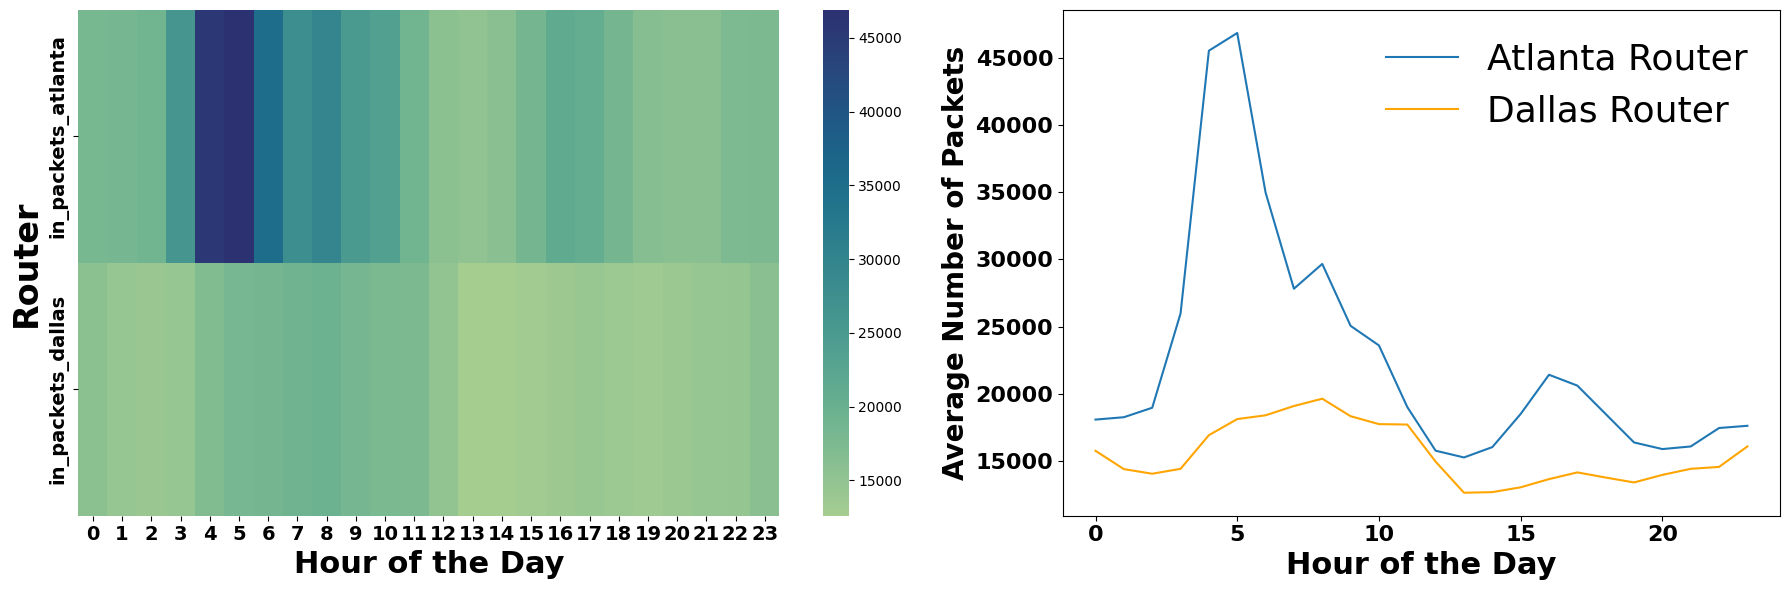

In [24]:
# # Create the figure and subplots side by side
# fig, axes = plt.subplots(1, 2, figsize=(18, 6),gridspec_kw={'width_ratios': [11, 9]})



# # Plot 1: Heatmap for hourly traffic distribution without annotation
# sns.heatmap(hourly_data.set_index('hour').T, cmap='crest', annot=False, ax=axes[0])
# axes[0].set_title('Hourly Traffic Distribution (Average Traffic per Hour)')
# axes[0].set_xlabel('Hour of Day')
# axes[0].set_ylabel('Router')



# # Plot 2: Line plot for average hourly traffic
# axes[1].plot(atlanta_hourly_avg.index, atlanta_hourly_avg.values, label='Atlanta Router',  color='#1f77b4')
# axes[1].plot(dallas_hourly_avg.index, dallas_hourly_avg.values, label='Dallas Router', color='orange')
# axes[1].set_title('Average Hourly Traffic for Atlanta and Dallas Routers')
# axes[1].set_xlabel('Hour of the Day')
# axes[1].set_ylabel('Average Number of Packets')
# axes[1].legend()

# # Show the combined plot
# plt.tight_layout()
# plt.show()






import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [11, 9]})

# Plot 1: Heatmap for hourly traffic distribution without annotation
sns.heatmap(hourly_data.set_index('hour').T, cmap='crest', annot=False, ax=axes[0])
# axes[0].set_title('Hourly Traffic Distribution (Average Traffic per Hour)', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Hour of the Day', fontsize=22, fontweight='bold')
axes[0].set_ylabel('Router', fontsize=24, fontweight='bold')

# Make x and y ticks bold and larger for the heatmap
axes[0].tick_params(axis='both', which='major', labelsize=14)
for label in axes[0].get_xticklabels() + axes[0].get_yticklabels():
    label.set_fontweight('bold')

# Plot 2: Line plot for average hourly traffic
axes[1].plot(atlanta_hourly_avg.index, atlanta_hourly_avg.values, label='Atlanta Router', color='#1f77b4')
axes[1].plot(dallas_hourly_avg.index, dallas_hourly_avg.values, label='Dallas Router', color='orange')
# axes[1].set_title('Average Hourly Traffic for Atlanta and Dallas Routers', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Hour of the Day', fontsize=22, fontweight='bold')
axes[1].set_ylabel('Average Number of Packets', fontsize=20, fontweight='bold')
axes[1].legend(fontsize=26, loc='best', frameon=False)

# Make x and y ticks bold and larger for the line plot
axes[1].tick_params(axis='both', which='major', labelsize=16)
for label in axes[1].get_xticklabels() + axes[1].get_yticklabels():
    label.set_fontweight('bold')

# Show the combined plot
plt.tight_layout()
plt.show()


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Assuming combined_data is already loaded as a DataFrame
# Convert 't_first' to datetime for resampling
combined_data['t_first'] = pd.to_datetime(combined_data['t_first'])

# Step 1: Resample to hourly traffic volume for each router
atlanta_data = combined_data[combined_data['router'] == 'Atlanta'].resample('H', on='t_first')['in_packets'].sum()
dallas_data = combined_data[combined_data['router'] == 'Dallas'].resample('H', on='t_first')['in_packets'].sum()

# Step 2: Resample to daily traffic volume for each router
atlanta_daily = combined_data[combined_data['router'] == 'Atlanta'].resample('D', on='t_first')['in_packets'].sum()
dallas_daily = combined_data[combined_data['router'] == 'Dallas'].resample('D', on='t_first')['in_packets'].sum()


/var/folders/l_/89dqsbtj1ys_lqvc8b_phr300000gq/T/ipykernel_65345/1472728547.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  atlanta_data = combined_data[combined_data['router'] == 'Atlanta'].resample('H', on='t_first')['in_packets'].sum()
/var/folders/l_/89dqsbtj1ys_lqvc8b_phr300000gq/T/ipykernel_65345/1472728547.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dallas_data = combined_data[combined_data['router'] == 'Dallas'].resample('H', on='t_first')['in_packets'].sum()


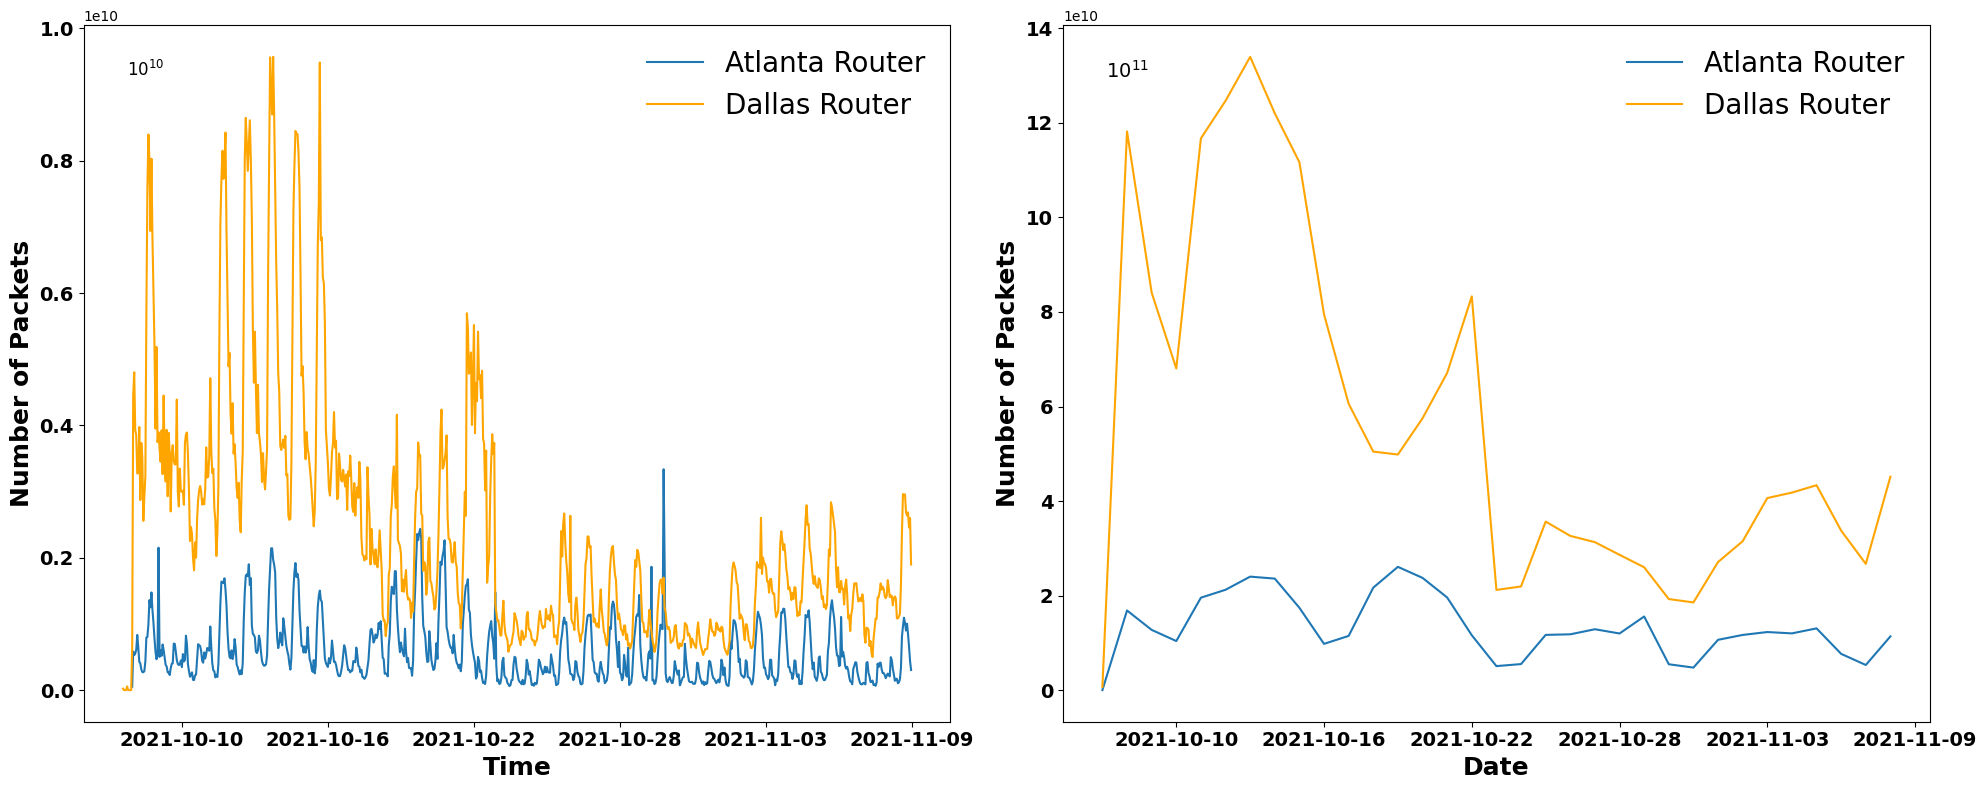

In [7]:

# # Create the figure and subplots side by side (1 row, 2 columns)
# fig, axes = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'width_ratios': [11, 9]})

# # Plot 1: Hourly Traffic Volume for both routers
# axes[0].plot(atlanta_data.index, atlanta_data.values, label='Atlanta Router', color='blue')
# axes[0].plot(dallas_data.index, dallas_data.values, label='Dallas Router', color='red')
# axes[0].set_title('Hourly Traffic Volume for Atlanta and Dallas Routers')
# axes[0].set_xlabel('Time')
# axes[0].set_ylabel('Number of Packets')
# axes[0].legend()

# # Plot 2: Daily Traffic Volume for both routers
# axes[1].plot(atlanta_daily.index, atlanta_daily.values, label='Atlanta Router', color='blue')
# axes[1].plot(dallas_daily.index, dallas_daily.values, label='Dallas Router', color='red')
# axes[1].set_title('Daily Traffic Volume for Atlanta and Dallas Routers')
# axes[1].set_xlabel('Date')
# axes[1].set_ylabel('Number of Packets')
# axes[1].legend()

# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Show the combined plot
# plt.show()






import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Create the figure and subplots side by side (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'width_ratios': [10, 10]})

# Plot 1: Hourly Traffic Volume for both routers
axes[0].plot(atlanta_data.index, atlanta_data.values, label='Atlanta Router', color='#1f77b4')
axes[0].plot(dallas_data.index, dallas_data.values, label='Dallas Router', color='orange')
# axes[0].set_title('Hourly Traffic Volume for Atlanta and Dallas Routers', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Time', fontsize=18, fontweight='bold')
axes[0].set_ylabel('Number of Packets', fontsize=18, fontweight='bold')
axes[0].legend(fontsize=20, frameon=False)
axes[0].xaxis.set_major_locator(MaxNLocator(6))  # Set x-ticks to 6


# Suppress scientific notation at the top and add custom label
axes[0].ticklabel_format(style='sci', axis='y', scilimits=(10, 10), useOffset=False)
axes[0].annotate(r'$10^{10}$', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
                 verticalalignment='top', fontweight='bold')


# Make x and y ticks bold and larger for Plot 1
axes[0].tick_params(axis='both', which='major', labelsize=14)
for label in axes[0].get_xticklabels() + axes[0].get_yticklabels():
    label.set_fontweight('bold')



# Plot 2: Daily Traffic Volume for both routers
axes[1].plot(atlanta_daily.index, atlanta_daily.values, label='Atlanta Router', color='#1f77b4')
axes[1].plot(dallas_daily.index, dallas_daily.values, label='Dallas Router', color='orange')
# axes[1].set_title('Daily Traffic Volume for Atlanta and Dallas Routers', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=18, fontweight='bold')
axes[1].set_ylabel('Number of Packets', fontsize=18, fontweight='bold')
axes[1].legend(fontsize=20, frameon=False)
axes[1].xaxis.set_major_locator(MaxNLocator(6))  # Set x-ticks to 6

# Suppress scientific notation at the top and add custom label
axes[1].ticklabel_format(style='sci', axis='y', scilimits=(10, 10), useOffset=False)
axes[1].annotate(r'$10^{11}$', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=14,
                 verticalalignment='top', fontweight='bold')

# Make x and y ticks bold and larger for Plot 2
axes[1].tick_params(axis='both', which='major', labelsize=14)
for label in axes[1].get_xticklabels() + axes[1].get_yticklabels():
    label.set_fontweight('bold')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()


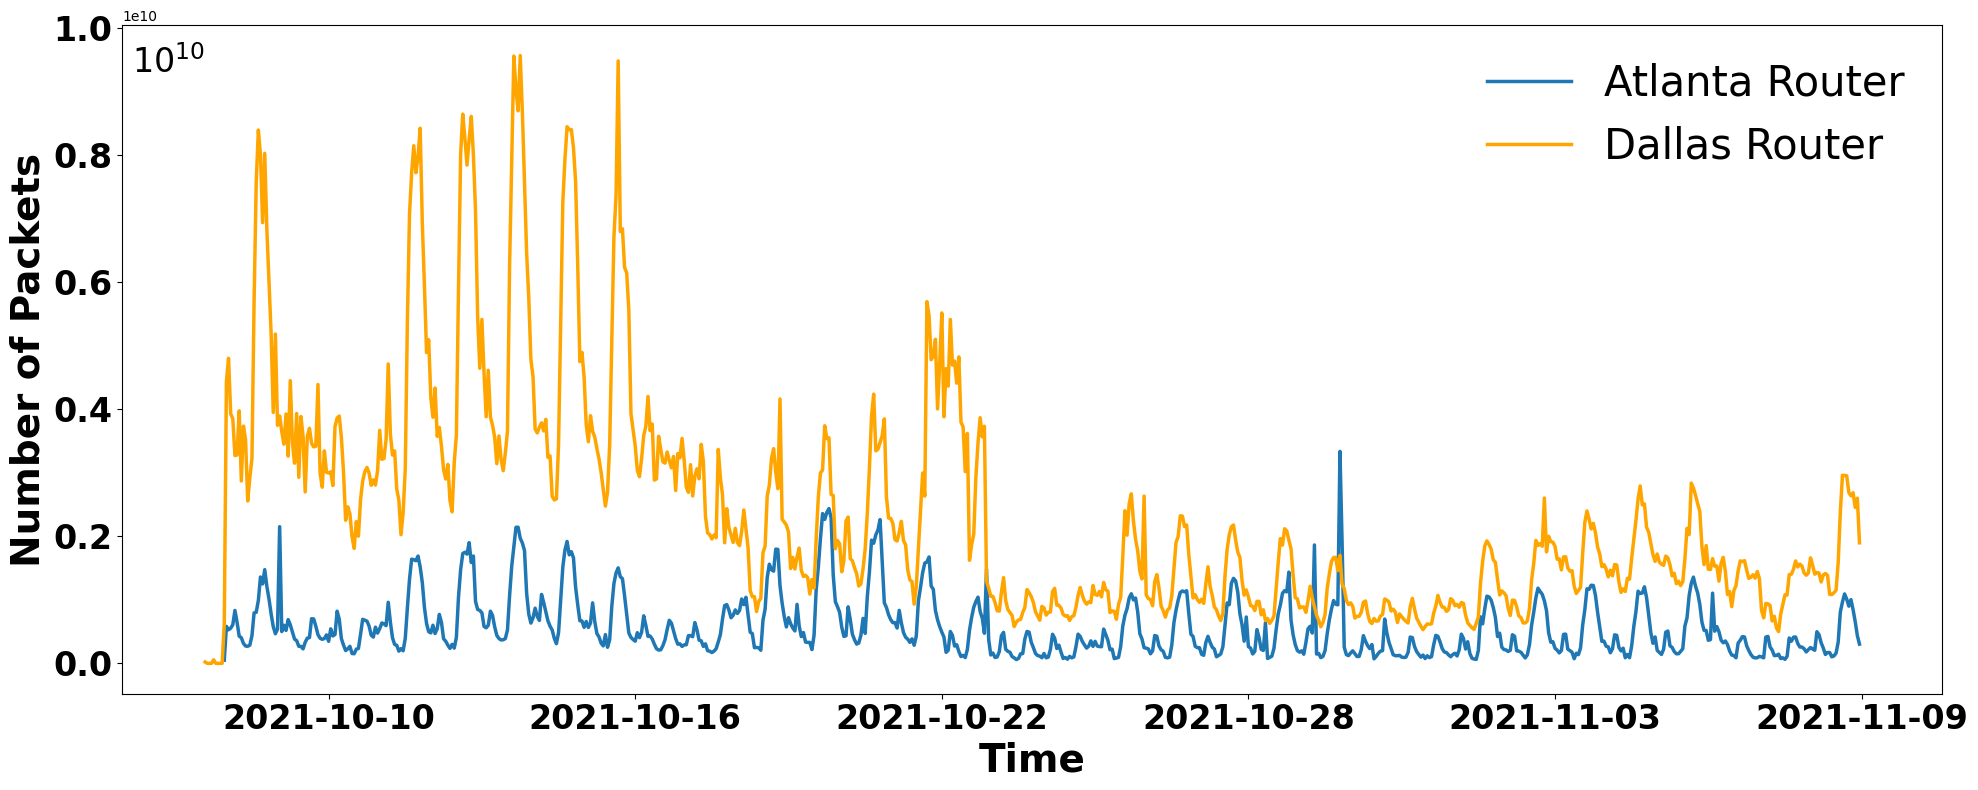

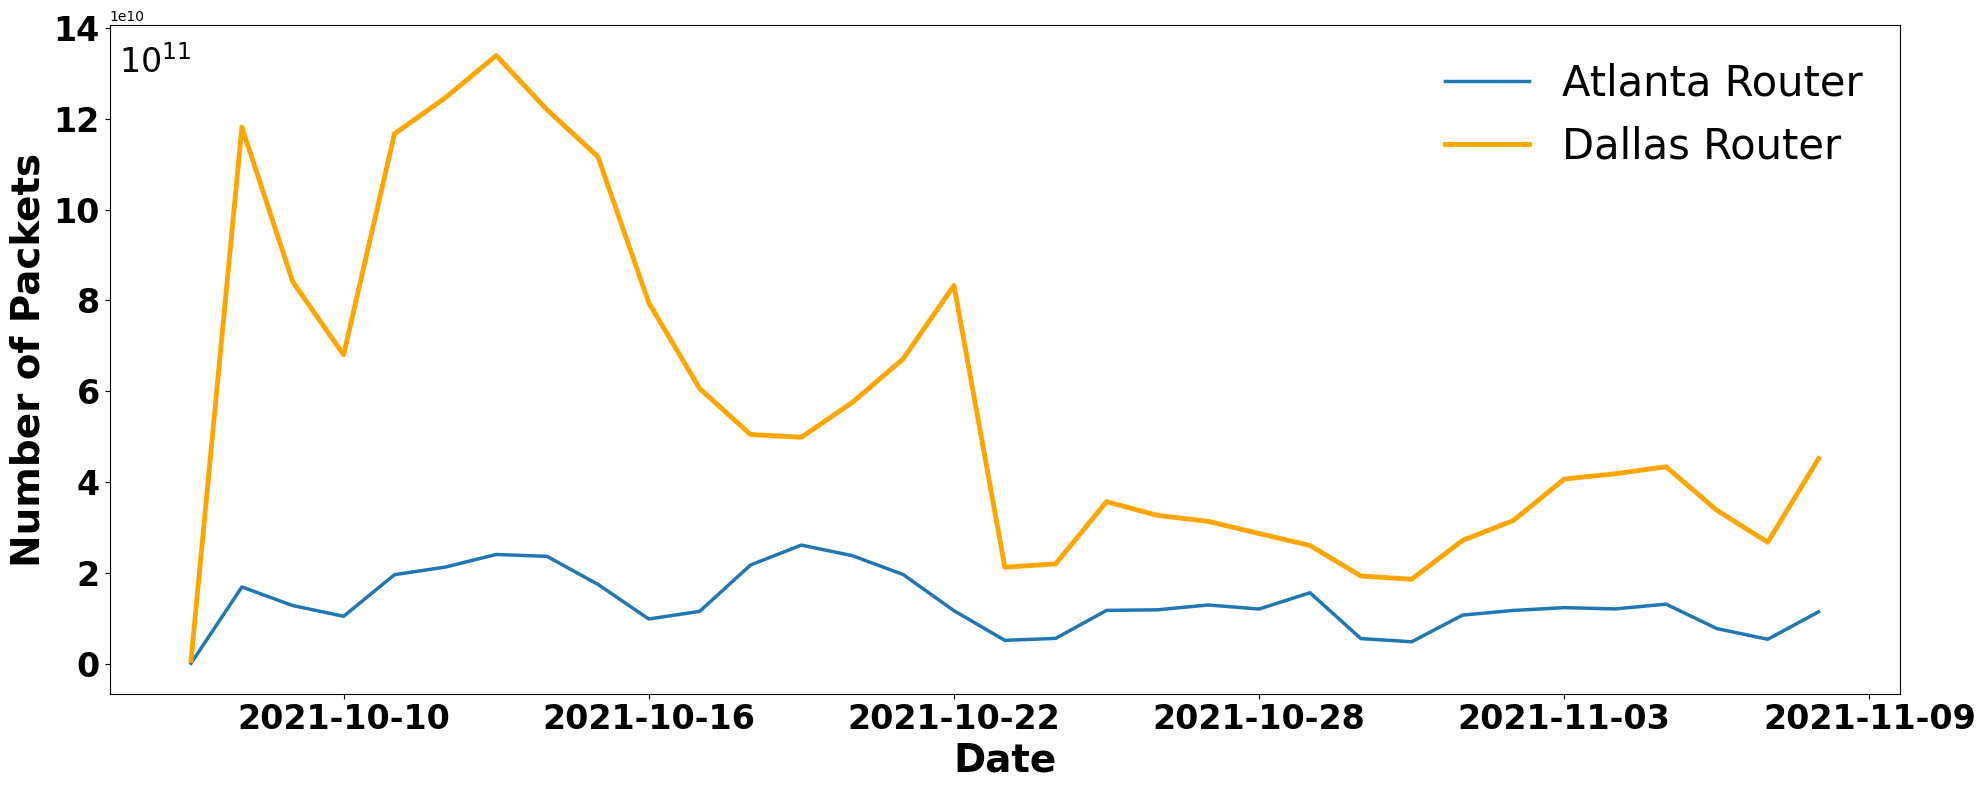

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Plot 1: Hourly Traffic Volume for both routers
fig, ax1 = plt.subplots(figsize=(20, 8))
ax1.plot(atlanta_data.index, atlanta_data.values, label='Atlanta Router', color='#1f77b4', linewidth=2.5)
ax1.plot(dallas_data.index, dallas_data.values, label='Dallas Router', color='orange', linewidth=2.5)
ax1.set_xlabel('Time', fontsize=28, fontweight='bold')
ax1.set_ylabel('Number of Packets', fontsize=28, fontweight='bold')
ax1.legend(fontsize=30, frameon=False)
ax1.xaxis.set_major_locator(MaxNLocator(6))  # Set x-ticks to 6

# Suppress scientific notation at the top and add custom label
ax1.ticklabel_format(style='sci', axis='y', scilimits=(10, 10), useOffset=False)
ax1.annotate(r'$10^{10}$', xy=(0.005, 0.97), xycoords='axes fraction', fontsize=24,
             verticalalignment='top', fontweight='bold')

# Make x and y ticks bold and larger for Plot 1
ax1.tick_params(axis='both', which='major', labelsize=24)
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()


# Plot 2: Daily Traffic Volume for both routers
fig, ax2 = plt.subplots(figsize=(20, 8))
ax2.plot(atlanta_daily.index, atlanta_daily.values, label='Atlanta Router', color='#1f77b4', linewidth=2.5)
ax2.plot(dallas_daily.index, dallas_daily.values, label='Dallas Router', color='orange', linewidth=3.5)
ax2.set_xlabel('Date', fontsize=28, fontweight='bold')
ax2.set_ylabel('Number of Packets', fontsize=28, fontweight='bold')
ax2.legend(fontsize=30, frameon=False)
ax2.xaxis.set_major_locator(MaxNLocator(6))  # Set x-ticks to 6

# Suppress scientific notation at the top and add custom label
ax2.ticklabel_format(style='sci', axis='y', scilimits=(10, 10), useOffset=False)
ax2.annotate(r'$10^{11}$', xy=(0.005, 0.97), xycoords='axes fraction', fontsize=24,
             verticalalignment='top', fontweight='bold')

# Make x and y ticks bold and larger for Plot 2
ax2.tick_params(axis='both', which='major', labelsize=24)
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()
